# import Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
from sklearn.metrics import r2_score ,mean_squared_error

#### Ouverture de Dataset

In [4]:
data = pd.read_csv("datas/train.csv")
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


# Dictionnaire de la Data


| Nom de la colonne   | Type   | Description                                             | Valeurs manquantes |
|---------------------|--------|---------------------------------------------------------|--------------------|
| Marque             | STR    | Marque de la voiture.                                   | 0                  |
| Modele             | STR    | Modèle de la marque.                                   | 0                  |
| Location           | STR    | L'emplacement où la voiture est vendue ou disponible. | 0                  |
| Year              | INT    | L'année ou l'édition du modèle de la voiture.         | 0                  |
| Kilometers_Driven | INT    | Nombre total de kilomètres parcourus.                 | 0                  |
| Fuel_Type         | STR    | Type de carburant utilisé (essence, diesel, etc.).     | 0                  |
| Transmission      | STR    | Type de transmission (manuelle ou automatique).       | 0                  |
| Owner_Type        | STR    | Type de propriétaire (1ère main, 2ème main, etc.).    | 0                  |
| Mileage           | STR    | Consommation de carburant (km/l ou km/kg).            | 2                  |
| Engine           | STR    | Volume du moteur en cc.                               | 36                 |
| Power            | STR    | Puissance maximale du moteur en bhp.                  | 36                 |
| Seats            | FLOAT  | Nombre de sièges dans la voiture.                     | 42                 |
| New_Price        | STR    | Prix de la voiture neuve.                             | 5195               |
| Price            | FLOAT  | Prix de la voiture d'occasion en INR Lakhs.          | 0                  |

# Data Cleaning
 

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

On doit drop la colonne `New_Price`, il y a trop de valeur manquante

In [8]:
data.drop("New_Price" ,axis=1 ,inplace =True)

Drop des valeurs na des colonnes `Engine` et `Power`

In [9]:
data = data.dropna(subset=['Engine', 'Power'])

In [10]:
# Permet de passer la colonne `Name` en lowercase
data['Name'] = data['Name'].str.lower()

Fonction qui permet de split la marque du modele, et gere les marques avec 2 mots comme land rover

In [11]:
data['Marque'] = data['Name'].apply(lambda x: "land-rover" if x.lower().startswith("land rover") else x.split()[0])

In [12]:
data['Marque'].value_counts()

Marque
maruti           1200
hyundai          1100
honda             602
toyota            410
mercedes-benz     318
volkswagen        315
ford              300
mahindra          272
bmw               262
audi              236
tata              186
skoda             173
renault           145
chevrolet         121
nissan             91
land-rover         57
jaguar             40
mitsubishi         27
mini               26
fiat               25
volvo              21
porsche            18
jeep               15
datsun             13
isuzu               3
force               3
smart               1
ambassador          1
bentley             1
lamborghini         1
Name: count, dtype: int64

In [13]:
def extract_model(name):
    name_parts = name.split()
    if "land" in name.lower():
        return " ".join(name_parts[2:])  # Récupère tout après les deux premiers mots
    else:
        return " ".join(name_parts[1:])  # Récupère tout après le premier mot

data['Model'] = data['Name'].apply(extract_model)

In [14]:
data.drop("Name" ,axis=1 ,inplace =True)

In [15]:
data[data['Marque'] == 'smart']

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Marque,Model
915,Pune,2008,103000,Diesel,Automatic,Second,0.0 kmpl,799 CC,null bhp,2.0,3.0,smart,fortwo cdi at


In [16]:
data[['Marque', 'Model']].head()

,Marque,Model
0,maruti,wagon r lxi cng
1,hyundai,creta 1.6 crdi sx option
2,honda,jazz v
3,maruti,ertiga vdi
4,audi,a4 new 2.0 tdi multitronic


In [17]:
data['Engine'].isna().value_counts()

Engine
False    5983
Name: count, dtype: int64

In [18]:
# Fonction pour extraire les valeurs numériques
def extract_numeric(value):
    if isinstance(value, str):
        value = ''.join([c for c in value if c.isdigit() or c == '.'])
        return float(value) if value else None
    return value

In [19]:
# Appliquer la conversion
data["Mileage"] = data["Mileage"].apply(extract_numeric)
data["Engine"] = data["Engine"].apply(extract_numeric)
data["Power"] = data["Power"].apply(extract_numeric)

In [20]:
data.isna().sum()

Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                 0
Power                107
Seats                  6
Price                  0
Marque                 0
Model                  0
dtype: int64

In [21]:
data.groupby('Marque')['Power'].mean().sort_values()

Marque
ambassador        35.500000
datsun            59.716923
maruti            74.245617
tata              79.595956
fiat              87.155652
renault           87.325172
nissan            88.371461
chevrolet         90.604583
hyundai           92.229726
volkswagen        94.671592
ford              96.755593
honda            108.541131
mahindra         121.285502
skoda            126.737442
toyota           128.921063
force            139.030000
mitsubishi       140.134815
mini             147.438462
isuzu            147.523333
jeep             169.333333
volvo            187.380952
land-rover       189.602105
audi             192.106043
mercedes-benz    193.579873
bmw              209.819847
jaguar           239.075250
porsche          331.287500
bentley          552.000000
lamborghini      560.000000
smart                   NaN
Name: Power, dtype: float64

In [22]:
data.groupby('Marque')['Engine'].median().sort_values()

Marque
smart             799.0
datsun            799.0
maruti           1197.0
hyundai          1197.0
chevrolet        1199.0
tata             1248.0
fiat             1248.0
nissan           1461.0
renault          1461.0
ambassador       1489.0
honda            1497.0
volkswagen       1498.0
ford             1498.0
mini             1798.0
skoda            1798.0
jeep             1956.0
audi             1968.0
volvo            1985.0
bmw              1995.0
mercedes-benz    2143.0
land-rover       2179.0
jaguar           2179.0
mahindra         2179.0
force            2200.0
mitsubishi       2477.0
toyota           2494.0
isuzu            2499.0
porsche          2967.0
lamborghini      5204.0
bentley          5998.0
Name: Engine, dtype: float64

In [23]:
data['Seats'] = data['Seats'].fillna(data['Seats'].median())

In [24]:
data.sample()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Marque,Model
4115,Kochi,2011,79940,Petrol,Manual,First,15.5,1586.0,103.3,5.0,2.78,maruti,sx4 zxi mt bsiv


Valeur de `Mileage`

In [25]:
data['Mileage'].sort_values()

915      0.00
3516     0.00
962      0.00
79       0.00
3093     0.00
        ...  
2059    33.54
3129    33.54
2371    33.54
4446      NaN
4904      NaN
Name: Mileage, Length: 5983, dtype: float64

> note

     Il y a des valeurs manquantes 

In [26]:
data['Mileage'].isna().sum()
data.drop(data[data['Mileage'].isna()].index, inplace =True)

In [27]:
data.groupby('Marque')['Mileage'].median().sort_values()

Marque
smart             0.000
lamborghini       6.400
bentley           8.600
isuzu            12.400
land-rover       12.650
ambassador       12.800
toyota           12.990
mitsubishi       13.170
volvo            13.500
mercedes-benz    14.210
porsche          14.375
jaguar           14.740
mahindra         15.100
audi             15.730
force            17.000
bmw              17.050
jeep             17.100
skoda            17.200
volkswagen       17.210
honda            17.800
mini             18.150
chevrolet        18.200
ford             18.880
hyundai          18.900
fiat             19.000
nissan           19.340
renault          19.870
tata             20.300
maruti           21.400
datsun           22.700
Name: Mileage, dtype: float64

In [28]:
median_mileage = data['Mileage'].median()
data.loc[data['Mileage'] == 0, 'Mileage'] = median_mileage

In [29]:
data['Mileage'].sort_values()

5781     6.40
5603     7.50
152      7.81
4821     7.94
4627     7.94
        ...  
4141    33.54
1332    33.54
2059    33.54
3129    33.54
2371    33.54
Name: Mileage, Length: 5981, dtype: float64

> Rappel

      Power a des valeurs manquantes 

In [30]:
data[data['Power'].isna()]


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Marque,Model
76,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.0,NaN,5.0,2.00,ford,fiesta 1.4 sxi tdci
79,Hyderabad,2005,87591,Petrol,Manual,First,18.16,1086.0,NaN,5.0,1.30,hyundai,santro xing xl
89,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,NaN,5.0,2.10,hyundai,santro xing xo
120,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,0.85,hyundai,santro xing xl erlx euro iii
143,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,1.67,hyundai,santro xing xo erlx euro ii
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Pune,2006,47200,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,1.20,hyundai,santro xing xo erlx euro ii
5893,Chennai,2008,51000,Petrol,Manual,Second,19.50,1061.0,NaN,5.0,1.75,maruti,estilo lxi
5925,Pune,2010,85000,Petrol,Manual,First,17.50,1798.0,NaN,5.0,2.85,skoda,laura classic 1.8 tsi
5943,Chennai,2002,75000,Diesel,Manual,First,18.16,2112.0,NaN,6.0,1.70,mahindra,jeep mm 540 dp


In [31]:
missing_count = data['Power'].isna().sum()
print(f"Nombre de valeurs manquantes dans power : {missing_count}")

Nombre de valeurs manquantes dans power : 107


In [32]:
data = data.dropna(subset=['Power'])

In [33]:
data.isna().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Marque               0
Model                0
dtype: int64

Conversion prix en euro

In [34]:
inr_to_eur = 0.011  # Taux de conversion INR -> EUR (à vérifier pour un taux actualisé)
# Conversion de la colonne "Price" (en Lakhs INR) en Euros
data['Price'] = data['Price'] * 100_000 * inr_to_eur

In [35]:
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Marque,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1925.0,maruti,wagon r lxi cng
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,13750.0,hyundai,creta 1.6 crdi sx option
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4950.0,honda,jazz v
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6600.0,maruti,ertiga vdi
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,19514.0,audi,a4 new 2.0 tdi multitronic


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5874 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5874 non-null   object 
 1   Year               5874 non-null   int64  
 2   Kilometers_Driven  5874 non-null   int64  
 3   Fuel_Type          5874 non-null   object 
 4   Transmission       5874 non-null   object 
 5   Owner_Type         5874 non-null   object 
 6   Mileage            5874 non-null   float64
 7   Engine             5874 non-null   float64
 8   Power              5874 non-null   float64
 9   Seats              5874 non-null   float64
 10  Price              5874 non-null   float64
 11  Marque             5874 non-null   object 
 12  Model              5874 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 642.5+ KB


In [37]:
data.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Marque',
       'Model'],
      dtype='object')

In [38]:
df = data[['Marque', 'Model', 'Location', 'Year', 'Kilometers_Driven', 
           'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 
           'Power', 'Seats', 'Price']].copy()

In [39]:
df.sample(10 ,random_state =32)

,Marque,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4325,toyota,corolla altis 2008-2013 1.8 vl at,Mumbai,2012,54000,Petrol,Automatic,First,14.53,1794.0,138.10,5.0,8250.0
3554,hyundai,verna 1.4 cx vtvt,Kolkata,2014,19000,Petrol,Manual,First,17.43,1396.0,105.50,5.0,5775.0
3774,maruti,ciaz zeta,Kochi,2018,10575,Petrol,Manual,First,21.56,1462.0,103.25,5.0,10098.0
5856,hyundai,elite i20 petrol asta,Chennai,2016,11000,Petrol,Manual,First,18.60,1197.0,81.86,5.0,8745.0
3501,toyota,corolla altis 1.8 g,Bangalore,2016,16471,Petrol,Manual,Second,14.28,1798.0,138.03,5.0,12650.0
1233,mercedes-benz,e-class 2015-2017 e250 cdi avantgarde,Kochi,2017,36884,Diesel,Automatic,First,13.00,2143.0,204.00,5.0,35475.0
969,skoda,rapid 1.5 tdi at ambition,Ahmedabad,2015,60001,Diesel,Automatic,First,21.66,1498.0,103.52,5.0,7975.0
1255,maruti,swift zdi,Hyderabad,2016,55746,Diesel,Manual,First,22.90,1248.0,74.00,5.0,7645.0
3410,land-rover,freelander 2 hse sd4,Ahmedabad,2012,60000,Diesel,Automatic,Second,12.35,2179.0,187.74,5.0,25850.0
3766,ford,ecosport 1.0 ecoboost platinum edition,Mumbai,2017,15000,Petrol,Manual,First,18.88,999.0,123.24,5.0,8800.0


In [ ]:
df['Model'].nunique()

1788

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5874 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Marque             5874 non-null   object 
 1   Model              5874 non-null   object 
 2   Location           5874 non-null   object 
 3   Year               5874 non-null   int64  
 4   Kilometers_Driven  5874 non-null   int64  
 5   Fuel_Type          5874 non-null   object 
 6   Transmission       5874 non-null   object 
 7   Owner_Type         5874 non-null   object 
 8   Mileage            5874 non-null   float64
 9   Engine             5874 non-null   float64
 10  Power              5874 non-null   float64
 11  Seats              5874 non-null   float64
 12  Price              5874 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 642.5+ KB


# EDA

- ###### relation between [ "Mileage" ,"Engine","Power"] and Price ?
- ###### The most expensive car?
- ###### Best Selling Cars ?
- ###### Average car prices per type ?
- ###### What kind of fuel do people prefer?
- ###### The average price of cars relative to the location ?
- ###### The average price of each car type for each Location ?
- ###### correlation between Price and Kilometers_Driven ?
- ###### Distribute of Transmission
- ###### correlation between Price and Transmission ?


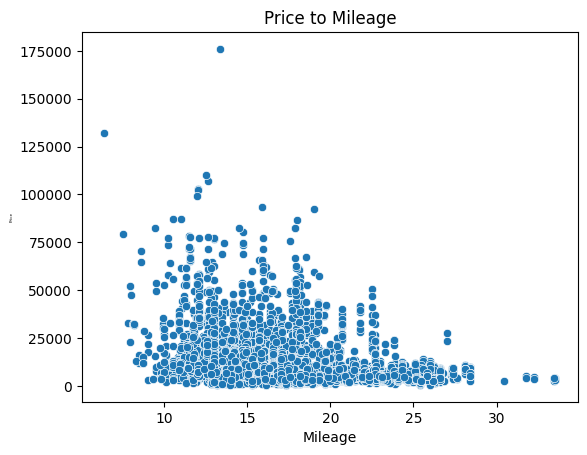

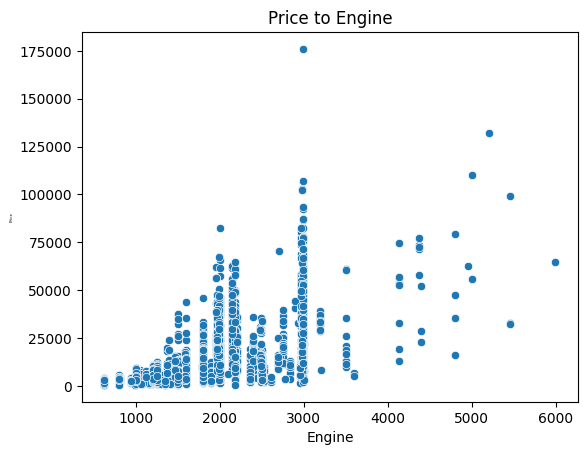

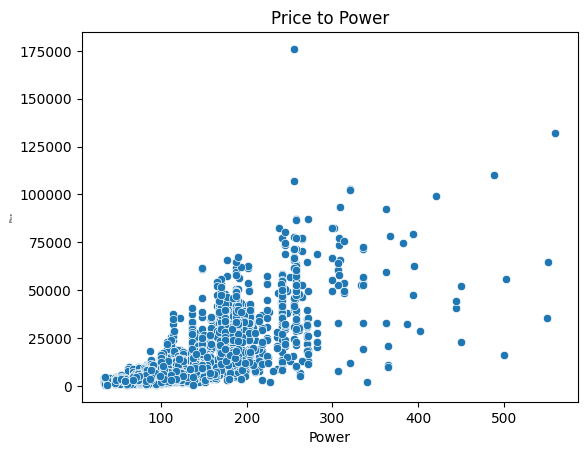

In [41]:
colums = ["Mileage","Engine","Power"]
for col in colums :
    plt.title(f"Price to {col}")
    sns.scatterplot(data = df , x=col ,y="Price")
    plt.xlabel(col)
    plt.ylabel("Price",fontsize=3)
    plt.show()

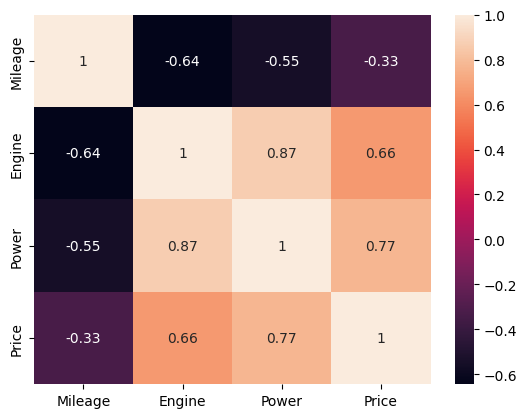

In [42]:
colums.append("Price")
first_corr_tabel = df[colums].corr()
sns.heatmap(first_corr_tabel,annot=True)
plt.show()

### The most expensive car?

In [43]:
df.iloc[df['Price'].argmax()]["Marque"]

'land-rover'

> most expensive car is Land Rover

#### Best Selling Cars ?

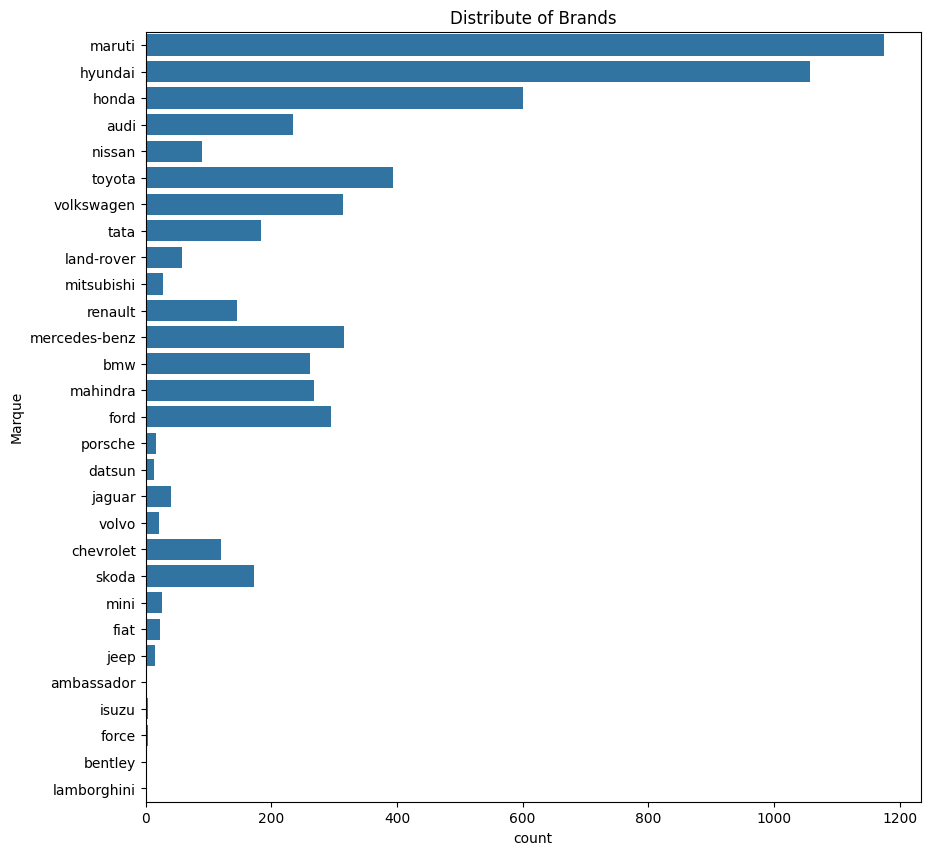

In [44]:
plt.figure(figsize=(10,10))
plt.title("Distribute of Brands")

sns.countplot(y=df['Marque'])
plt.show()


In [45]:
pd.DataFrame(df['Marque'].value_counts()[:5])

,count
Marque,
maruti,1175
hyundai,1058
honda,601
toyota,394
mercedes-benz,316


#### Average car prices per type ?

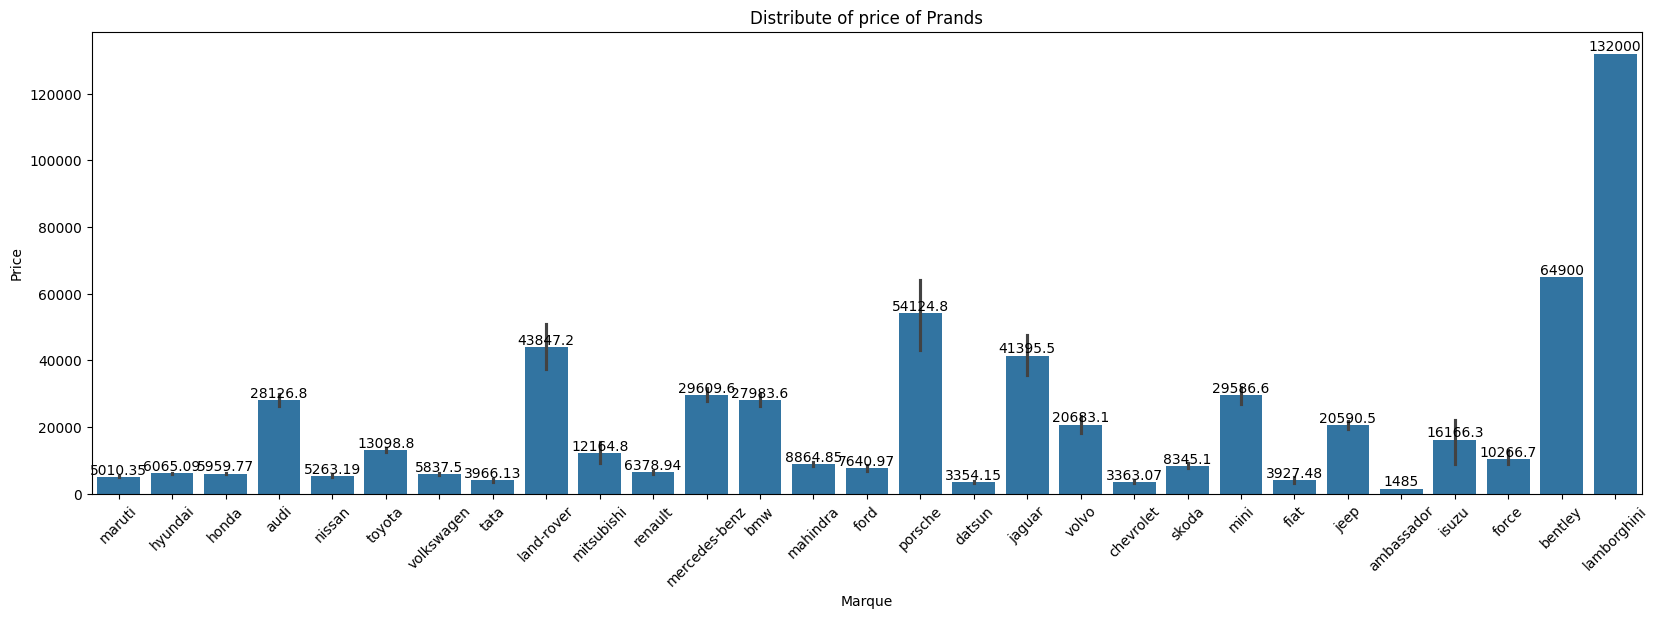

In [47]:
plt.figure(figsize=(20,6))
plt.title("Distribute of price of Prands")
figure = sns.barplot(data= df , x ="Marque" ,y="Price")
for contain in figure.containers :
    figure.bar_label(contain)
plt.xticks(rotation=45)
plt.show()

In [470]:
pd.DataFrame(np.round(df.groupby("Marque")["Price"].mean(),2).sort_values(ascending=False))


,Price
Marque,
lamborghini,132000.00
bentley,64900.00
porsche,54124.81
land-rover,43847.16
jaguar,41395.48
mercedes-benz,29609.63
mini,29586.62
audi,28126.77
bmw,27983.58


#### What kind of fuel do people prefer?

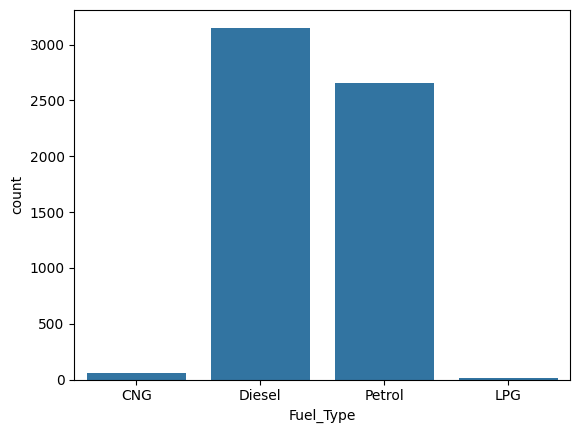

In [471]:
sns.countplot(data =df , x= "Fuel_Type")
plt.show()

In [473]:
pd.DataFrame(df['Fuel_Type'].value_counts())

,count
Fuel_Type,
Diesel,3153
Petrol,2656
CNG,55
LPG,10


- people prefer Diesel and Petrol

#### Type of oldest car ?

In [477]:
df.loc[df['Year'].idxmin(), ['Marque', 'Model']]

Marque     maruti
Model     zen lxi
Name: 3138, dtype: object

- the oldest car is 'Maruti Zen'

In [479]:
df.sample()

,Marque,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Type
4032,hyundai,grand i10 crdi magna,Delhi,2014,42000,Diesel,Manual,First,24.0,1120.0,70.0,5.0,3850.0,hyundai


#### The average price of cars relative to the location ?


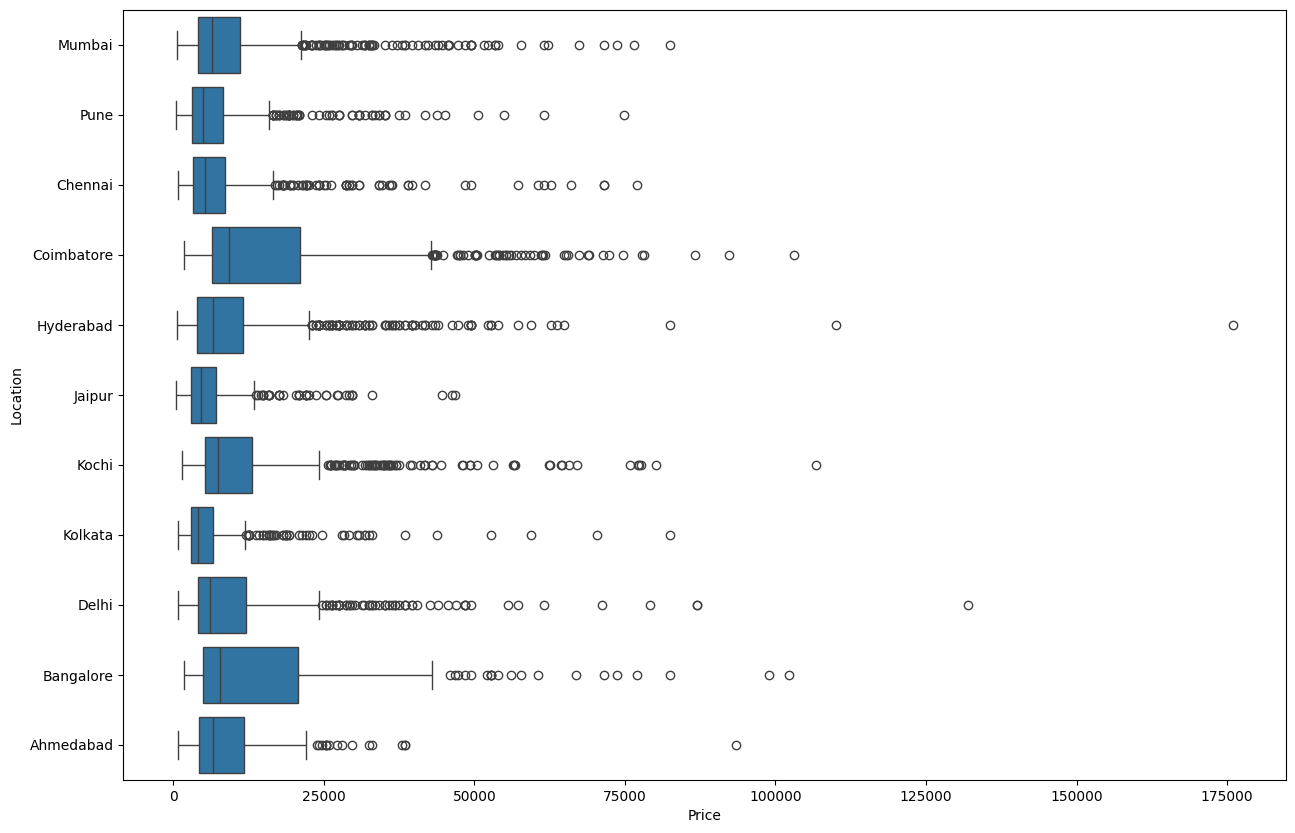

In [480]:
plt.figure(figsize=(15,10))
sns.boxplot(data= df ,x= "Price",y="Location")
plt.show()

In [481]:
pd.DataFrame(np.round(df.groupby("Location")["Price"].mean(),2).sort_values(ascending=False))


,Price
Location,
Coimbatore,16654.38
Bangalore,14970.11
Kochi,12360.42
Hyderabad,10901.90
Delhi,10756.89
Mumbai,10380.27
Ahmedabad,9368.65
Chennai,8739.04
Pune,7595.00


#### The average price of each car type for each Location ?

In [482]:
pd.crosstab( index=df["Marque" ],columns=  df["Location"],values=df['Price']
            ,aggfunc=["mean"]).fillna(0)

mean                                            \
Location          Ahmedabad     Bangalore       Chennai    Coimbatore   
Marque                                                                  
ambassador         0.000000      0.000000   1485.000000      0.000000   
audi           16060.000000  31293.281250  29363.888889  35782.340000   
bentley            0.000000      0.000000      0.000000      0.000000   
bmw            27016.733333  32812.000000  30973.148148  33863.666667   
chevrolet       3877.500000   4376.428571   2651.846154   5048.000000   
datsun             0.000000   3168.000000   3025.000000   3641.000000   
fiat               0.000000      0.000000   2612.500000   6237.000000   
force              0.000000      0.000000  13200.000000      0.000000   
ford            6288.333333   5188.764706   6544.755556  11935.687500   
honda           6182.423077   6347.423077   5406.971429   7763.853659   
hyundai         6372.108696   7121.653846   5290.690141   8662.045113   
isuzu              0.000000      0.000000      0.000000  17699.000000   
jaguar             0.000000  30048.333333  29150.000000  35151.285714   
jeep               0.000000      0.000000      0.000000  23705.000000   
lamborghini        0.000000      0.000000      0.000000      0.000000   
land-rover     22550.000000  54450.000000  18150.000000  55432.300000   
mahindra        9724.000000   7934.473684   5984.500000  11735.263158   
maruti          5056.700000   5292.571429   4850.645161   6864.473118   
mercedes-benz  28272.200000  33282.764706  25975.000000  44943.708333   
mini           24200.000000  29700.000000  24200.000000  21351.000000   
mitsubishi         0.000000  15782.250000   5302.000000  23941.500000   
nissan          4482.500000   7150.000000   4649.615385   6868.400000   
porsche            0.000000  82500.000000      0.000000  57405.333333   
renault         4936.250000   8155.230769   6132.500000   8930.428571   
skoda           9918.333333   8463.888889   6013.333333  10640.666667   
tata            3385.555556   4486.625000   2769.904762   5363.500000   
toyota         13906.444444  14855.210526  10960.125000  16590.378378   
volkswagen      5536.666667   5561.187500   6292.868421   7947.703704   
volvo          17600.000000  23100.000000  10587.500000  26796.000000   

                                                                        \
Location               Delhi     Hyderabad        Jaipur         Kochi   
Marque                                                                   
ambassador          0.000000      0.000000      0.000000      0.000000   
audi            20937.481481  30391.862069  18012.500000  29448.320000   
bentley             0.000000  64900.000000      0.000000      0.000000   
bmw             23028.500000  26701.333333  29865.000000  34521.960000   
chevrolet        2240.333333   4460.500000   2634.500000   4094.750000   
datsun              0.000000   3289.000000      0.000000   3894.000000   
fiat             1815.000000   5005.000000   2461.250000   6435.000000   
force               0.000000      0.000000      0.000000      0.000000   
ford             9023.235294   7373.200000   5236.000000  11546.965517   
honda            4804.800000   7201.255319   5139.256410   7478.506173   
hyundai          5634.719101   5298.950495   4944.238095   6940.678832   
isuzu               0.000000      0.000000  15400.000000      0.000000   
jaguar          48730.000000  55137.500000      0.000000  38720.000000   
jeep                0.000000  18590.000000  21450.000000  19811.000000   
lamborghini    132000.000000      0.000000      0.000000      0.000000   
land-rover      37632.692308  48917.000000  18150.000000  53785.875000   
mahindra         8928.562500   8337.592593   8937.823529   9883.823529   
maruti           4906.294643   5037.544379   4116.798246   6477.495726   
mercedes-benz   25702.794118  26973.964286  23672.916667  28117.157895   
mini            24200.000000  29128.000000  25300.000000  

> note 
- you can see that location Affects the price
  - example
      - Audi the distribute of car is more different in any Location
     
- you can find some car find in one Location 
   - Ambassador in China
   - Lamborghini in Delhi
   - Jaguar 

In [483]:
df.sample()

,Marque,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Type
3697,bmw,5 series 520d luxury line,Ahmedabad,2010,46000,Diesel,Automatic,First,22.48,1995.0,190.0,5.0,18150.0,bmw


In [49]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

kilometers = df['Kilometers_Driven']
price = df['Price']

kilometers_reshaped = kilometers.values.reshape(-1, 1)

#
scaler = StandardScaler()

kilometers_scaled = scaler.fit_transform(kilometers_reshaped)

corr_coef, p_value = pearsonr(kilometers_scaled.flatten(), price)

# Output the results
print("Pearson correlation coefficient after scaling:", corr_coef)
print("P-value after scaling:", p_value)


Pearson correlation coefficient after scaling: -0.008298378118258662
P-value after scaling: 0.5248545776719068


> note
- there is a significant correlation between the standardized 'Number of Kilometers' and the 'Price' of the vehicles in the dataset.

<Axes: xlabel='Transmission', ylabel='count'>

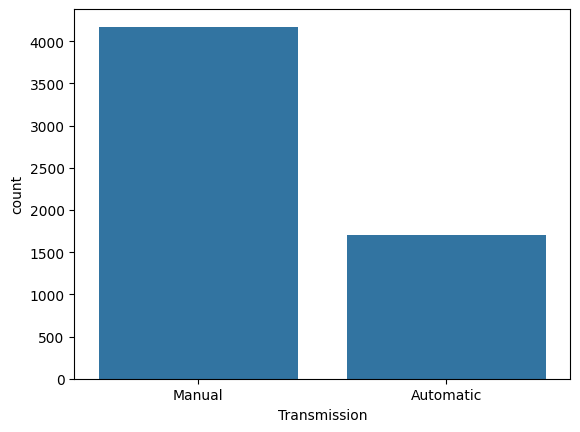

In [50]:
sns.countplot(x= df["Transmission"])

In [51]:
from scipy.stats import f_oneway


Transmission_groups = [df[df['Transmission'] == category]['Price'] for category in df['Transmission'].unique()]

# Perform ANOVA test
anova_result = f_oneway(*Transmission_groups)

# Output the ANOVA test result
print("ANOVA F-value:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)


ANOVA F-value: 3065.848019563559
ANOVA p-value: 0.0


> note
- strong relationship between the transmission type and the price of cars.

> #### summary
- you can see the some simple Question and read the Result from nodes 
  - if you have another Question at EDA you can write a comment

# 🚨 Fin de l'EDA 🚨